In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense,  LSTM,  Dropout
%matplotlib inline
from keras import metrics
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from plot_keras_history import plot_history

Using TensorFlow backend.
C:\home\anaconda\envs\TF\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
import os
path = os.getcwd()
print(path)

C:\home\program


In [3]:
os.chdir('../')

# data

In [4]:
oosaka = pd.read_csv('program/Stock2/stock2-oosaka.csv', encoding="shift_jis")
oosaka['day'] = pd.to_datetime(oosaka['day'], format='%Y/%m/%d')
tokyo = pd.read_csv('program/Stock2/stock2-tokyo.csv', encoding="shift_jis")
tokyo['day'] = pd.to_datetime(tokyo['day'], format='%Y/%m/%d')
aichi = pd.read_csv('program/Stock2/stock2-aichi.csv', encoding="shift_jis")
aichi['day'] = pd.to_datetime(aichi['day'], format='%Y/%m/%d')
saitama = pd.read_csv('program/Stock2/stock2-saitama.csv', encoding="shift_jis")
saitama['day'] = pd.to_datetime(saitama['day'], format='%Y/%m/%d')
hukuoka = pd.read_csv('program/Stock2/stock2-hukuoka.csv', encoding="shift_jis")
hukuoka['day'] = pd.to_datetime(hukuoka['day'], format='%Y/%m/%d')

In [5]:
oosaka.set_index('day')
dateTimeIndex = pd.DatetimeIndex(oosaka['day'])
oosaka.index = dateTimeIndex

In [6]:
tokyo.set_index('day')
dateTimeIndex = pd.DatetimeIndex(tokyo['day'])
tokyo.index = dateTimeIndex

In [7]:
aichi.set_index('day')
dateTimeIndex = pd.DatetimeIndex(aichi['day'])
aichi.index = dateTimeIndex

In [8]:
saitama.set_index('day')
dateTimeIndex = pd.DatetimeIndex(saitama['day'])
saitama.index = dateTimeIndex

In [9]:
hukuoka.set_index('day')
dateTimeIndex = pd.DatetimeIndex(hukuoka['day'])
hukuoka.index = dateTimeIndex

In [10]:
TimeIndex = pd.date_range("2019-10-02", periods=367, freq="D")
TimeIndex2 = pd.date_range("2020-04-04", periods=182, freq="D")

In [11]:
oosaka = oosaka.resample('D').interpolate()
tokyo = tokyo.resample('D').interpolate()
aichi = aichi.resample('D').interpolate()
saitama = saitama.resample('D').interpolate()
hukuoka = hukuoka.resample('D').interpolate()

In [12]:
oosaka.drop("day", axis=1)
tokyo.drop("day", axis=1)
aichi.drop("day", axis=1)
saitama.drop("day", axis=1)
hukuoka.drop("day", axis=1)

,start,hight,low,end
day,,,,
2019-10-02,2043.000000,2068.000000,2018.000000,2064.000000
2019-10-03,2004.000000,2028.000000,1983.000000,2026.000000
2019-10-04,1976.000000,1998.000000,1969.000000,1986.000000
2019-10-05,1980.333333,2000.333333,1966.333333,1983.333333
2019-10-06,1984.666667,2002.666667,1963.666667,1980.666667
...,...,...,...,...
2020-09-28,1885.000000,1919.000000,1878.000000,1919.000000
2020-09-29,1903.000000,1905.000000,1854.000000,1876.000000
2020-09-30,1842.000000,1845.000000,1764.000000,1764.000000


# 大阪

In [13]:
L = len(oosaka)
Y = oosaka.iloc[:, 4]  # 終値の列のみ抽出する。
Y = np.array(Y)  # numpy配列に変換する。
Y = Y.reshape(-1, 1)  # 行列に変換する。（配列の要素数行×1列）

In [14]:
X1 = Y[0:L-3, :]  # 予測対象日の3日前のデータ
X2 = Y[1:L-2, :]  # 予測対象日の2日前のデータ
X3 = Y[2:L-1, :]  # 予測対象日の前日データ
Y = Y[3:L, :]  # 予測対象日のデータ
X = np.concatenate([X1, X2, X3], axis=1)  # numpy配列を結合する。

In [15]:
scaler = MinMaxScaler()  # データを0～1の範囲にスケールするための関数。
scaler.fit(X)  # スケーリングに使用する最小／最大値を計算する。
X = scaler.transform(X)  # Xをを0～1の範囲にスケーリングする。

In [16]:
scaler1 = MinMaxScaler()  # データを0～1の範囲にスケールするための関数。
scaler1.fit(Y)  # スケーリングに使用する最小／最大値を計算する。
Y = scaler1.transform(Y)  # Yをを0～1の範囲にスケーリングする。

In [17]:
X = np.reshape(X, (X.shape[0], 1, X.shape[1]))  # 3次元配列に変換する。

In [18]:
len(X)

364

In [19]:
# train, testデータを定義
X_train = X[:182, :, :]
X_test = X[182:, :, :]
Y_train = Y[:182, :]
Y_test = Y[182:, :]

In [20]:
model = Sequential()
model.add(LSTM(10, activation = 'tanh', input_shape = (1,3), recurrent_activation= 'hard_sigmoid'))
model.add(Dense(1))

Epoch 1/50
 - 0s - loss: 0.4490 - mean_absolute_error: 0.6250
Epoch 2/50
 - 0s - loss: 0.3949 - mean_absolute_error: 0.5840
Epoch 3/50
 - 0s - loss: 0.3557 - mean_absolute_error: 0.5517
Epoch 4/50
 - 0s - loss: 0.3212 - mean_absolute_error: 0.5232
Epoch 5/50
 - 0s - loss: 0.2885 - mean_absolute_error: 0.4950
Epoch 6/50
 - 0s - loss: 0.2579 - mean_absolute_error: 0.4667
Epoch 7/50
 - 0s - loss: 0.2288 - mean_absolute_error: 0.4390
Epoch 8/50
 - 0s - loss: 0.2014 - mean_absolute_error: 0.4112
Epoch 9/50
 - 0s - loss: 0.1756 - mean_absolute_error: 0.3837
Epoch 10/50
 - 0s - loss: 0.1514 - mean_absolute_error: 0.3557
Epoch 11/50
 - 0s - loss: 0.1291 - mean_absolute_error: 0.3281
Epoch 12/50
 - 0s - loss: 0.1085 - mean_absolute_error: 0.3009
Epoch 13/50
 - 0s - loss: 0.0897 - mean_absolute_error: 0.2742
Epoch 14/50
 - 0s - loss: 0.0730 - mean_absolute_error: 0.2479
Epoch 15/50
 - 0s - loss: 0.0582 - mean_absolute_error: 0.2220
Epoch 16/50
 - 0s - loss: 0.0456 - mean_absolute_error: 0.1965
E

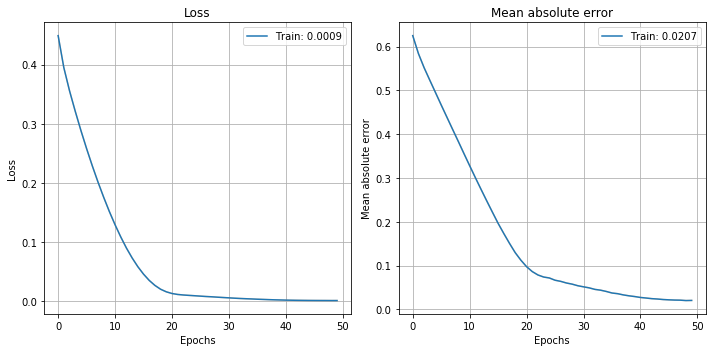

In [21]:
model.compile(loss= 'mean_squared_error', optimizer = 'rmsprop', metrics=[metrics.mae])
history = model.fit(X_train, Y_train, epochs=50, verbose=2).history
plot_history(history)
P_oosaka = model.predict(X_test)

In [22]:
# オリジナルのスケールに戻す、タイムインデックスを付ける。
Y_train = scaler1.inverse_transform(Y_train)
Y_train = pd.DataFrame(Y_train)
Y_train.index = pd.to_datetime(oosaka.iloc[3:185,0])

In [23]:
Y_test = scaler1.inverse_transform(Y_test)
Y_test = pd.DataFrame(Y_test)
Y_test.index = pd.to_datetime(oosaka.iloc[185:,0])

In [24]:
P_oosaka = scaler1.inverse_transform(P_oosaka)
P_oosaka = pd.DataFrame(P_oosaka)
P_oosaka.index=pd.to_datetime(oosaka.iloc[185:,0])

In [25]:
P_oosaka.index = TimeIndex2
Y_test.index = TimeIndex2
T_oosaka = Y_test

# 東京

In [26]:
L = len(tokyo)
Y = tokyo.iloc[:, 4]  # 終値の列のみ抽出する。
Y = np.array(Y)  # numpy配列に変換する。
Y = Y.reshape(-1, 1)  # 行列に変換する。（配列の要素数行×1列）

In [27]:
X1 = Y[0:L-3, :]  # 予測対象日の3日前のデータ
X2 = Y[1:L-2, :]  # 予測対象日の2日前のデータ
X3 = Y[2:L-1, :]  # 予測対象日の前日データ
Y = Y[3:L, :]  # 予測対象日のデータ
X = np.concatenate([X1, X2, X3], axis=1)  # numpy配列を結合する。

In [28]:
scaler.fit(X)  # スケーリングに使用する最小／最大値を計算する。
X = scaler.transform(X)  # Xをを0～1の範囲にスケーリングする。

In [29]:
scaler1.fit(Y)  # スケーリングに使用する最小／最大値を計算する。
Y = scaler1.transform(Y)  # Yをを0～1の範囲にスケーリングする。

In [30]:
X = np.reshape(X, (X.shape[0], 1, X.shape[1]))  # 3次元配列に変換する。

In [31]:
# train, testデータを定義
X_train = X[:182, :, :]
X_test = X[182:, :, :]
Y_train = Y[:182, :]
Y_test = Y[182:, :]

In [32]:
model = Sequential()
model.add(LSTM(10, activation = 'tanh', input_shape = (1,3), recurrent_activation= 'hard_sigmoid'))
model.add(Dense(1))

Epoch 1/50
 - 0s - loss: 0.4037 - mean_absolute_error: 0.5973
Epoch 2/50
 - 0s - loss: 0.3510 - mean_absolute_error: 0.5553
Epoch 3/50
 - 0s - loss: 0.3143 - mean_absolute_error: 0.5239
Epoch 4/50
 - 0s - loss: 0.2829 - mean_absolute_error: 0.4954
Epoch 5/50
 - 0s - loss: 0.2544 - mean_absolute_error: 0.4681
Epoch 6/50
 - 0s - loss: 0.2276 - mean_absolute_error: 0.4418
Epoch 7/50
 - 0s - loss: 0.2026 - mean_absolute_error: 0.4152
Epoch 8/50
 - 0s - loss: 0.1797 - mean_absolute_error: 0.3891
Epoch 9/50
 - 0s - loss: 0.1582 - mean_absolute_error: 0.3638
Epoch 10/50
 - 0s - loss: 0.1379 - mean_absolute_error: 0.3377
Epoch 11/50
 - 0s - loss: 0.1195 - mean_absolute_error: 0.3131
Epoch 12/50
 - 0s - loss: 0.1025 - mean_absolute_error: 0.2881
Epoch 13/50
 - 0s - loss: 0.0870 - mean_absolute_error: 0.2639
Epoch 14/50
 - 0s - loss: 0.0728 - mean_absolute_error: 0.2401
Epoch 15/50
 - 0s - loss: 0.0602 - mean_absolute_error: 0.2171
Epoch 16/50
 - 0s - loss: 0.0490 - mean_absolute_error: 0.1945
E

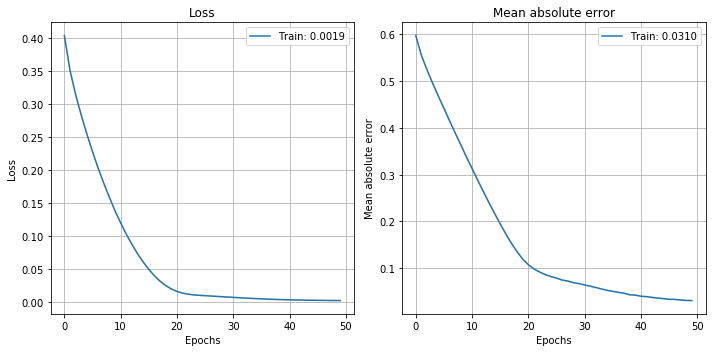

In [33]:
model.compile(loss= 'mean_squared_error', optimizer = 'rmsprop', metrics=[metrics.mae])
history = model.fit(X_train, Y_train, epochs=50, verbose=2).history
plot_history(history)
P_tokyo = model.predict(X_test)

In [34]:
# オリジナルのスケールに戻す、タイムインデックスを付ける。
Y_train = scaler1.inverse_transform(Y_train)
Y_train = pd.DataFrame(Y_train)
Y_train.index = pd.to_datetime(tokyo.iloc[3:185,0])

In [35]:
Y_test = scaler1.inverse_transform(Y_test)
Y_test = pd.DataFrame(Y_test)
Y_test.index = pd.to_datetime(tokyo.iloc[185:,0])

In [36]:
P_tokyo = scaler1.inverse_transform(P_tokyo)
P_tokyo = pd.DataFrame(P_tokyo)
P_tokyo.index=pd.to_datetime(tokyo.iloc[185:,0])

In [37]:
P_tokyo.index = TimeIndex2
Y_test.index = TimeIndex2
T_tokyo = Y_test

# 愛知

In [38]:
L = len(aichi)
Y = aichi.iloc[:, 4]  # 終値の列のみ抽出する。
Y = np.array(Y)  # numpy配列に変換する。
Y = Y.reshape(-1, 1)  # 行列に変換する。（配列の要素数行×1列）

In [39]:
X1 = Y[0:L-3, :]  # 予測対象日の3日前のデータ
X2 = Y[1:L-2, :]  # 予測対象日の2日前のデータ
X3 = Y[2:L-1, :]  # 予測対象日の前日データ
Y = Y[3:L, :]  # 予測対象日のデータ
X = np.concatenate([X1, X2, X3], axis=1)  # numpy配列を結合する。

In [40]:
scaler.fit(X)  # スケーリングに使用する最小／最大値を計算する。
X = scaler.transform(X)  # Xをを0～1の範囲にスケーリングする。

In [41]:
scaler1.fit(Y)  # スケーリングに使用する最小／最大値を計算する。
Y = scaler1.transform(Y)  # Yをを0～1の範囲にスケーリングする。

In [42]:
X = np.reshape(X, (X.shape[0], 1, X.shape[1]))  # 3次元配列に変換する。

In [43]:
# train, testデータを定義
X_train = X[:182, :, :]
X_test = X[182:, :, :]
Y_train = Y[:182, :]
Y_test = Y[182:, :]

In [44]:
model = Sequential()
model.add(LSTM(10, activation = 'tanh', input_shape = (1,3), recurrent_activation= 'hard_sigmoid'))
model.add(Dense(1))

Epoch 1/50
 - 0s - loss: 0.4569 - mean_absolute_error: 0.6449
Epoch 2/50
 - 0s - loss: 0.4000 - mean_absolute_error: 0.6022
Epoch 3/50
 - 0s - loss: 0.3602 - mean_absolute_error: 0.5706
Epoch 4/50
 - 0s - loss: 0.3256 - mean_absolute_error: 0.5418
Epoch 5/50
 - 0s - loss: 0.2940 - mean_absolute_error: 0.5141
Epoch 6/50
 - 0s - loss: 0.2643 - mean_absolute_error: 0.4868
Epoch 7/50
 - 0s - loss: 0.2365 - mean_absolute_error: 0.4596
Epoch 8/50
 - 0s - loss: 0.2098 - mean_absolute_error: 0.4320
Epoch 9/50
 - 0s - loss: 0.1848 - mean_absolute_error: 0.4043
Epoch 10/50
 - 0s - loss: 0.1615 - mean_absolute_error: 0.3772
Epoch 11/50
 - 0s - loss: 0.1395 - mean_absolute_error: 0.3493
Epoch 12/50
 - 0s - loss: 0.1192 - mean_absolute_error: 0.3216
Epoch 13/50
 - 0s - loss: 0.1003 - mean_absolute_error: 0.2945
Epoch 14/50
 - 0s - loss: 0.0829 - mean_absolute_error: 0.2665
Epoch 15/50
 - 0s - loss: 0.0675 - mean_absolute_error: 0.2394
Epoch 16/50
 - 0s - loss: 0.0541 - mean_absolute_error: 0.2139
E

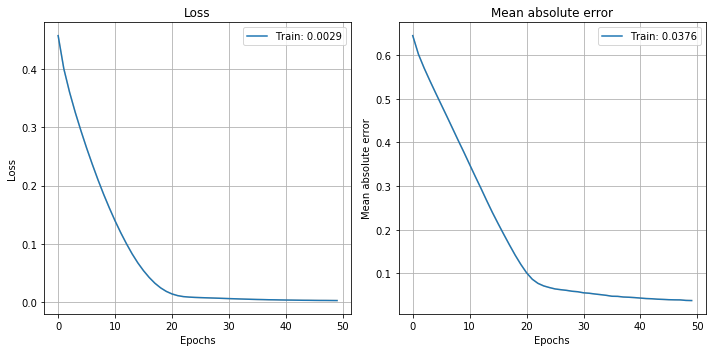

In [45]:
model.compile(loss= 'mean_squared_error', optimizer = 'rmsprop', metrics=[metrics.mae])
history = model.fit(X_train, Y_train, epochs=50, verbose=2).history
plot_history(history)
P_aichi = model.predict(X_test)

In [46]:
# オリジナルのスケールに戻す、タイムインデックスを付ける。
Y_train = scaler1.inverse_transform(Y_train)
Y_train = pd.DataFrame(Y_train)
Y_train.index = pd.to_datetime(aichi.iloc[3:185,0])

In [47]:
Y_test = scaler1.inverse_transform(Y_test)
Y_test = pd.DataFrame(Y_test)
Y_test.index = pd.to_datetime(aichi.iloc[185:,0])

In [48]:
P_aichi = scaler1.inverse_transform(P_aichi)
P_aichi = pd.DataFrame(P_aichi)
P_aichi.index=pd.to_datetime(aichi.iloc[185:,0])

In [49]:
P_aichi.index = TimeIndex2
Y_test.index = TimeIndex2
T_aichi = Y_test

# 埼玉

In [50]:
L = len(saitama)
Y = saitama.iloc[:, 4]  # 終値の列のみ抽出する。
Y = np.array(Y)  # numpy配列に変換する。
Y = Y.reshape(-1, 1)  # 行列に変換する。（配列の要素数行×1列）

In [51]:
X1 = Y[0:L-3, :]  # 予測対象日の3日前のデータ
X2 = Y[1:L-2, :]  # 予測対象日の2日前のデータ
X3 = Y[2:L-1, :]  # 予測対象日の前日データ
Y = Y[3:L, :]  # 予測対象日のデータ
X = np.concatenate([X1, X2, X3], axis=1)  # numpy配列を結合する。

In [52]:
scaler.fit(X)  # スケーリングに使用する最小／最大値を計算する。
X = scaler.transform(X)  # Xをを0～1の範囲にスケーリングする。

In [53]:
scaler1.fit(Y)  # スケーリングに使用する最小／最大値を計算する。
Y = scaler1.transform(Y)  # Yをを0～1の範囲にスケーリングする。

In [54]:
X = np.reshape(X, (X.shape[0], 1, X.shape[1]))  # 3次元配列に変換する。

In [55]:
# train, testデータを定義
X_train = X[:182, :, :]
X_test = X[182:, :, :]
Y_train = Y[:182, :]
Y_test = Y[182:, :]

In [56]:
model = Sequential()
model.add(LSTM(10, activation = 'tanh', input_shape = (1,3), recurrent_activation= 'hard_sigmoid'))
model.add(Dense(1))

Epoch 1/50
 - 0s - loss: 0.6394 - mean_absolute_error: 0.7451
Epoch 2/50
 - 0s - loss: 0.5777 - mean_absolute_error: 0.7064
Epoch 3/50
 - 0s - loss: 0.5335 - mean_absolute_error: 0.6778
Epoch 4/50
 - 0s - loss: 0.4943 - mean_absolute_error: 0.6522
Epoch 5/50
 - 0s - loss: 0.4579 - mean_absolute_error: 0.6273
Epoch 6/50
 - 0s - loss: 0.4229 - mean_absolute_error: 0.6030
Epoch 7/50
 - 0s - loss: 0.3889 - mean_absolute_error: 0.5780
Epoch 8/50
 - 0s - loss: 0.3565 - mean_absolute_error: 0.5537
Epoch 9/50
 - 0s - loss: 0.3245 - mean_absolute_error: 0.5287
Epoch 10/50
 - 0s - loss: 0.2942 - mean_absolute_error: 0.5036
Epoch 11/50
 - 0s - loss: 0.2655 - mean_absolute_error: 0.4785
Epoch 12/50
 - 0s - loss: 0.2377 - mean_absolute_error: 0.4533
Epoch 13/50
 - 0s - loss: 0.2111 - mean_absolute_error: 0.4275
Epoch 14/50
 - 0s - loss: 0.1863 - mean_absolute_error: 0.4025
Epoch 15/50
 - 0s - loss: 0.1627 - mean_absolute_error: 0.3770
Epoch 16/50
 - 0s - loss: 0.1408 - mean_absolute_error: 0.3520
E

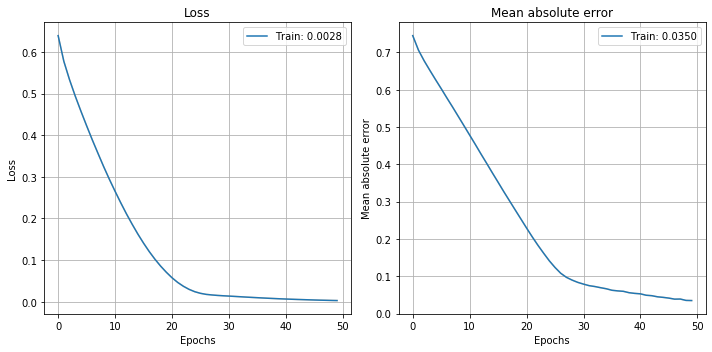

In [57]:
model.compile(loss= 'mean_squared_error', optimizer = 'rmsprop', metrics=[metrics.mae])
history = model.fit(X_train, Y_train, epochs=50, verbose=2).history
plot_history(history)
P_saitama = model.predict(X_test)

In [58]:
# オリジナルのスケールに戻す、タイムインデックスを付ける。
Y_train = scaler1.inverse_transform(Y_train)
Y_train = pd.DataFrame(Y_train)
Y_train.index = pd.to_datetime(saitama.iloc[3:185,0])

In [59]:
Y_test = scaler1.inverse_transform(Y_test)
Y_test = pd.DataFrame(Y_test)
Y_test.index = pd.to_datetime(saitama.iloc[185:,0])

In [60]:
P_saitama = scaler1.inverse_transform(P_saitama)
P_saitama = pd.DataFrame(P_saitama)
P_saitama.index=pd.to_datetime(saitama.iloc[185:,0])

In [61]:
P_saitama.index = TimeIndex2
Y_test.index = TimeIndex2
T_saitama = Y_test

# 福岡

In [62]:
L = len(hukuoka)
Y = hukuoka.iloc[:, 4]  # 終値の列のみ抽出する。
Y = np.array(Y)  # numpy配列に変換する。
Y = Y.reshape(-1, 1)  # 行列に変換する。（配列の要素数行×1列）

In [63]:
X1 = Y[0:L-3, :]  # 予測対象日の3日前のデータ
X2 = Y[1:L-2, :]  # 予測対象日の2日前のデータ
X3 = Y[2:L-1, :]  # 予測対象日の前日データ
Y = Y[3:L, :]  # 予測対象日のデータ
X = np.concatenate([X1, X2, X3], axis=1)  # numpy配列を結合する。

In [64]:
scaler.fit(X)  # スケーリングに使用する最小／最大値を計算する。
X = scaler.transform(X)  # Xをを0～1の範囲にスケーリングする。

In [65]:
scaler1.fit(Y)  # スケーリングに使用する最小／最大値を計算する。
Y = scaler1.transform(Y)  # Yをを0～1の範囲にスケーリングする。

In [66]:
X = np.reshape(X, (X.shape[0], 1, X.shape[1]))  # 3次元配列に変換する。

In [67]:
# train, testデータを定義
X_train = X[:182, :, :]
X_test = X[182:, :, :]
Y_train = Y[:182, :]
Y_test = Y[182:, :]

In [68]:
model = Sequential()
model.add(LSTM(10, activation = 'tanh', input_shape = (1,3), recurrent_activation= 'hard_sigmoid'))
model.add(Dense(1))

Epoch 1/50
 - 0s - loss: 0.7627 - mean_absolute_error: 0.8148
Epoch 2/50
 - 0s - loss: 0.6994 - mean_absolute_error: 0.7784
Epoch 3/50
 - 0s - loss: 0.6553 - mean_absolute_error: 0.7522
Epoch 4/50
 - 0s - loss: 0.6169 - mean_absolute_error: 0.7288
Epoch 5/50
 - 0s - loss: 0.5814 - mean_absolute_error: 0.7062
Epoch 6/50
 - 0s - loss: 0.5477 - mean_absolute_error: 0.6845
Epoch 7/50
 - 0s - loss: 0.5154 - mean_absolute_error: 0.6627
Epoch 8/50
 - 0s - loss: 0.4837 - mean_absolute_error: 0.6414
Epoch 9/50
 - 0s - loss: 0.4524 - mean_absolute_error: 0.6194
Epoch 10/50
 - 0s - loss: 0.4221 - mean_absolute_error: 0.5982
Epoch 11/50
 - 0s - loss: 0.3924 - mean_absolute_error: 0.5768
Epoch 12/50
 - 0s - loss: 0.3632 - mean_absolute_error: 0.5548
Epoch 13/50
 - 0s - loss: 0.3349 - mean_absolute_error: 0.5326
Epoch 14/50
 - 0s - loss: 0.3073 - mean_absolute_error: 0.5103
Epoch 15/50
 - 0s - loss: 0.2804 - mean_absolute_error: 0.4876
Epoch 16/50
 - 0s - loss: 0.2546 - mean_absolute_error: 0.4648
E

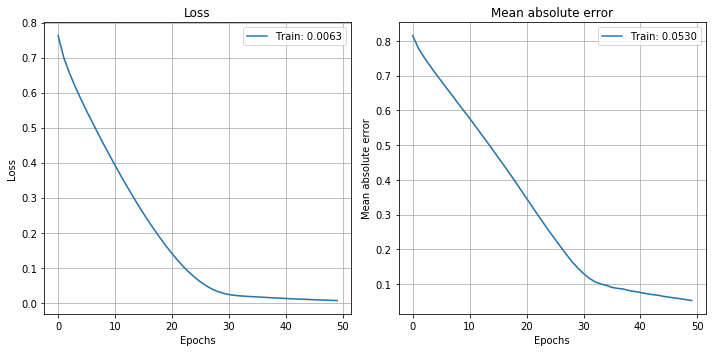

In [69]:
model.compile(loss= 'mean_squared_error', optimizer = 'rmsprop', metrics=[metrics.mae])
history = model.fit(X_train, Y_train, epochs=50, verbose=2).history
plot_history(history)
P_hukuoka = model.predict(X_test)

In [70]:
# オリジナルのスケールに戻す、タイムインデックスを付ける。
Y_train = scaler1.inverse_transform(Y_train)
Y_train = pd.DataFrame(Y_train)
Y_train.index = pd.to_datetime(hukuoka.iloc[3:185,0])

In [71]:
Y_test = scaler1.inverse_transform(Y_test)
Y_test = pd.DataFrame(Y_test)
Y_test.index = pd.to_datetime(hukuoka.iloc[185:,0])

In [72]:
P_hukuoka = scaler1.inverse_transform(P_hukuoka)
P_hukuoka = pd.DataFrame(P_hukuoka)
P_hukuoka.index=pd.to_datetime(hukuoka.iloc[185:,0])

In [73]:
P_hukuoka.index = TimeIndex2
Y_test.index = TimeIndex2
T_hukuoka = Y_test

# plot

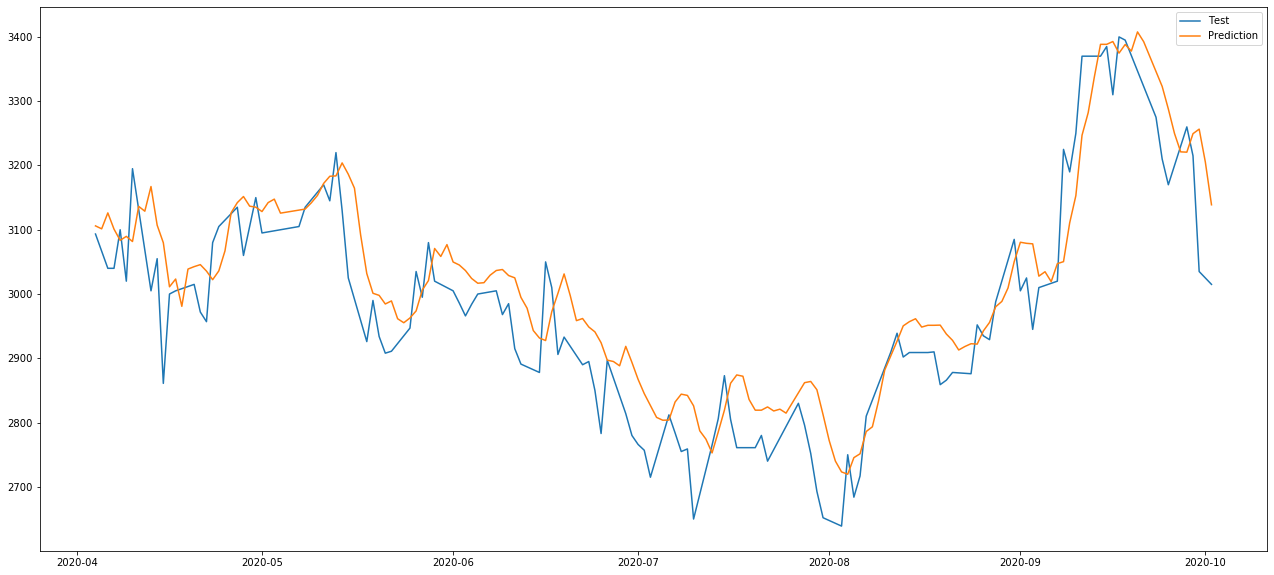

In [74]:
plt.figure(figsize=(22,10))
plt.plot(T_aichi, label = 'Test')
plt.plot(P_aichi, label = 'Prediction')
plt.legend(loc='best')
plt.show()

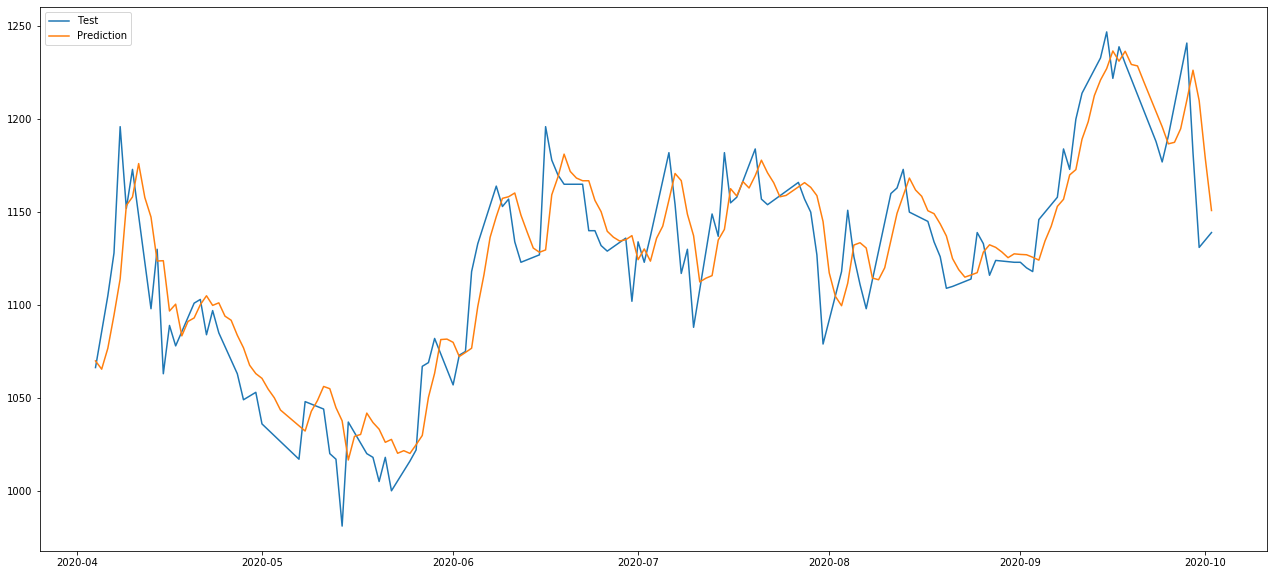

In [75]:
plt.figure(figsize=(22,10))
plt.plot(T_tokyo, label = 'Test')
plt.plot(P_tokyo, label = 'Prediction')
plt.legend(loc='best')
plt.show()

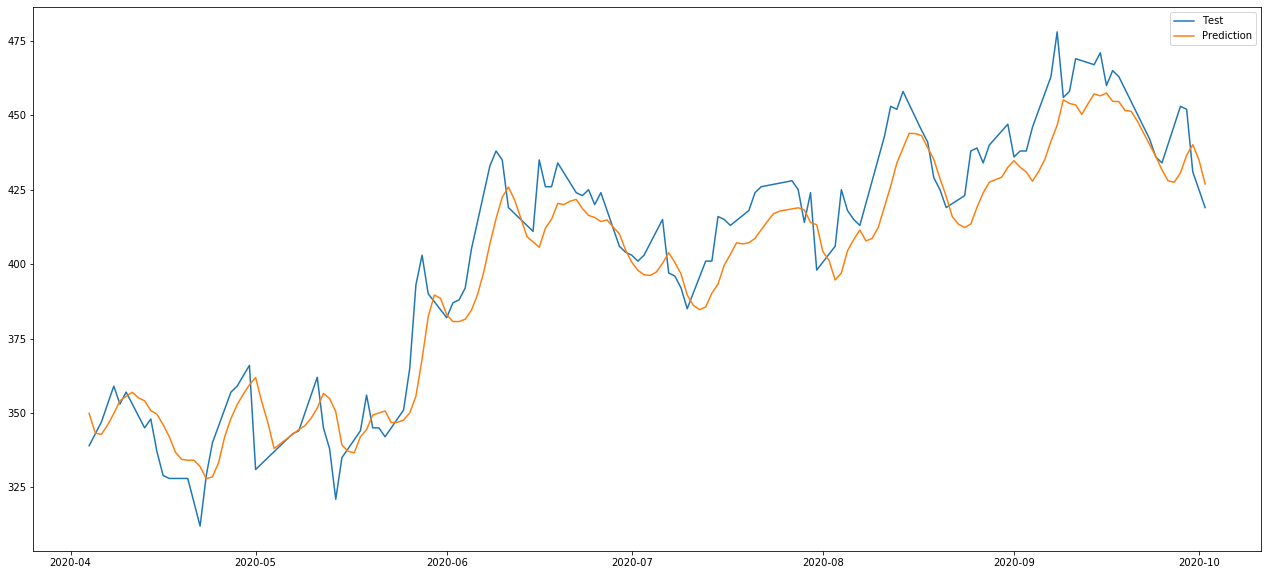

In [76]:
plt.figure(figsize=(22,10))
plt.plot(T_oosaka, label = 'Test')
plt.plot(P_oosaka, label = 'Prediction')
plt.legend(loc='best')
plt.show()

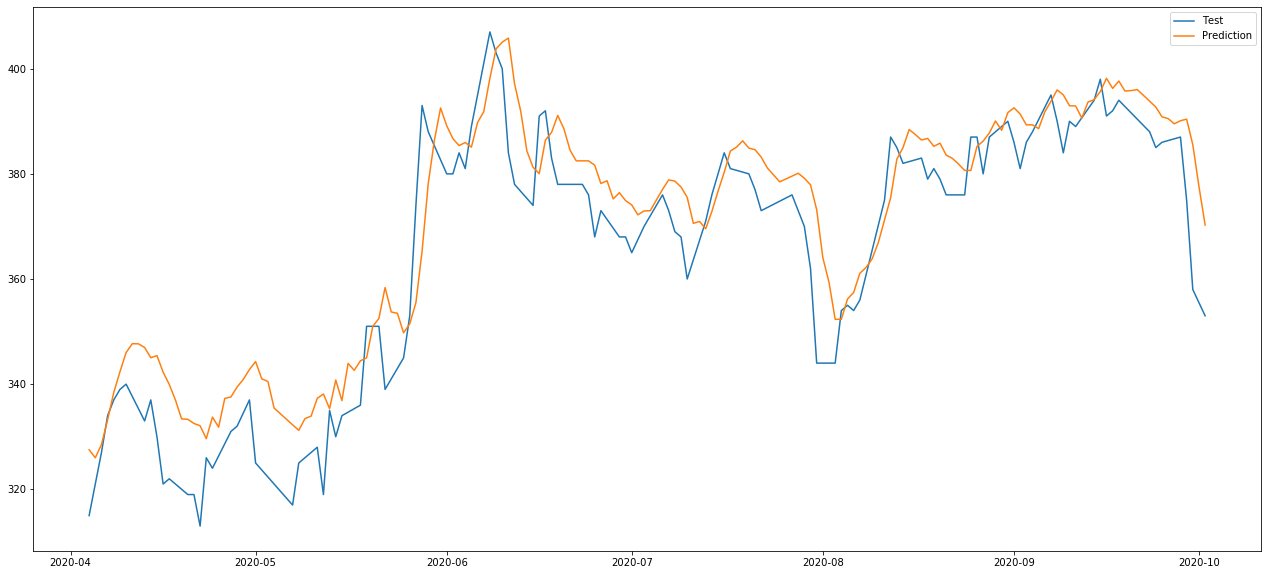

In [77]:
plt.figure(figsize=(22,10))
plt.plot(T_saitama, label = 'Test')
plt.plot(P_saitama, label = 'Prediction')
plt.legend(loc='best')
plt.show()

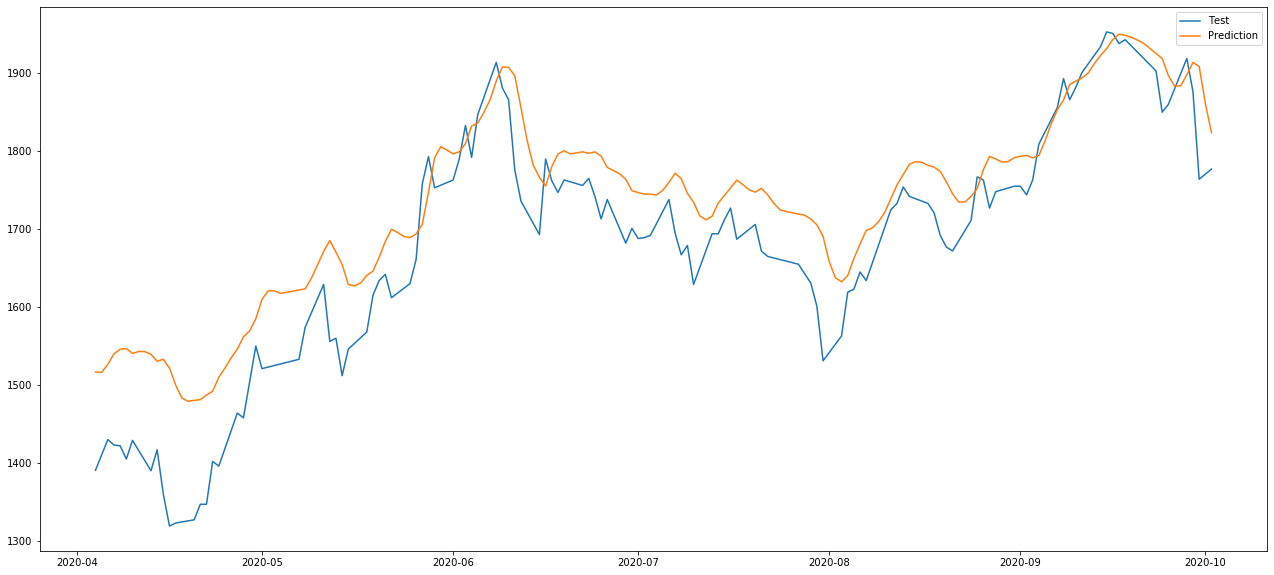

In [78]:
plt.figure(figsize=(22,10))
plt.plot(T_hukuoka, label = 'Test')
plt.plot(P_hukuoka, label = 'Prediction')
plt.legend(loc='best')
plt.show()

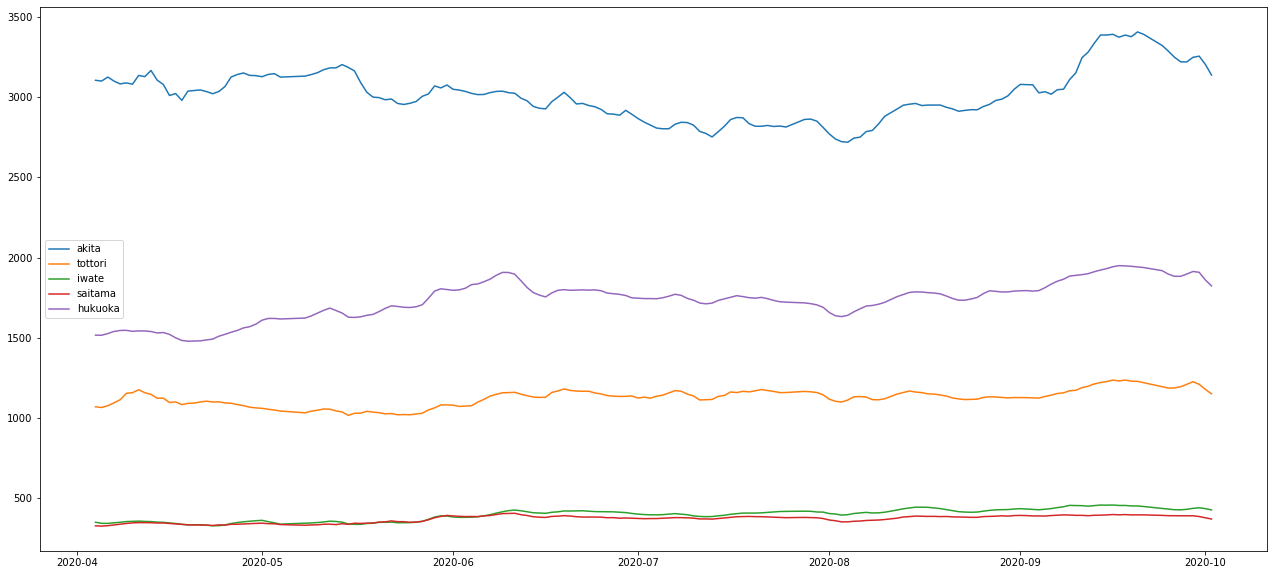

In [79]:
plt.figure(figsize=(22,10))
plt.plot(P_aichi, label = 'akita')
plt.plot(P_tokyo, label = 'tottori')
plt.plot(P_oosaka, label = 'iwate')
plt.plot(P_saitama, label = 'saitama')
plt.plot(P_hukuoka, label = 'hukuoka')
plt.legend(loc='best')
plt.show()

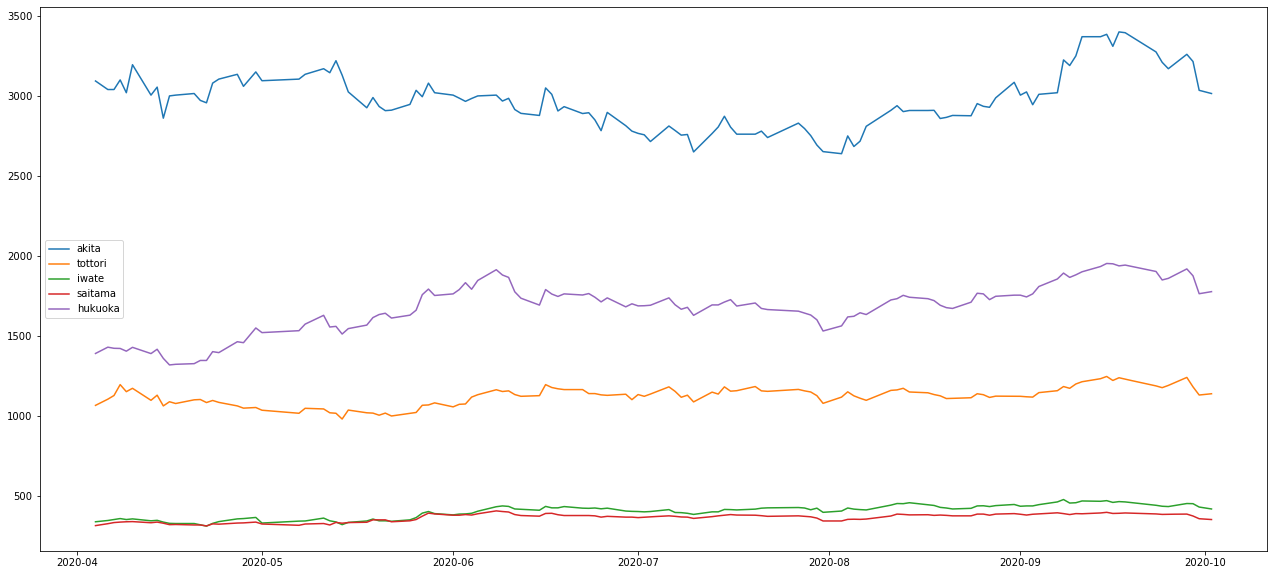

In [80]:
plt.figure(figsize=(22,10))
plt.plot(T_aichi, label = 'akita')
plt.plot(T_tokyo, label = 'tottori')
plt.plot(T_oosaka, label = 'iwate')
plt.plot(T_saitama, label = 'saitama')
plt.plot(T_hukuoka, label = 'hukuoka')
plt.legend(loc='best')
plt.show()

In [81]:
P_aichi['diff']=P_aichi.diff()
P_tokyo['diff']=P_tokyo.diff()
P_oosaka['diff']=P_oosaka.diff()
P_saitama['diff']=P_saitama.diff()
P_hukuoka['diff']=P_hukuoka.diff()

In [82]:
T_aichi['diff'] = T_aichi.diff()
T_tokyo['diff'] = T_tokyo.diff()
T_oosaka['diff'] = T_oosaka.diff()
T_saitama['diff'] = T_saitama.diff()
T_hukuoka['diff'] = T_hukuoka.diff()

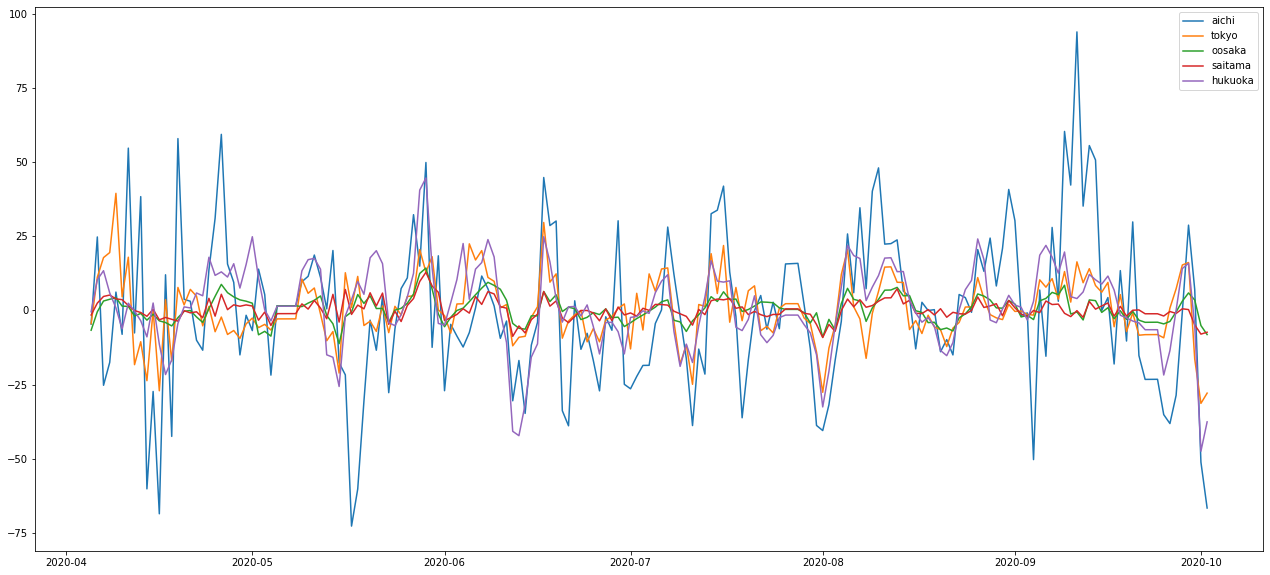

In [83]:
plt.figure(figsize=(22,10))
plt.plot(P_aichi['diff'], label = 'aichi')
plt.plot(P_tokyo['diff'], label = 'tokyo')
plt.plot(P_oosaka['diff'], label = 'oosaka')
plt.plot(P_saitama['diff'], label = 'saitama')
plt.plot(P_hukuoka['diff'], label = 'hukuoka')
plt.savefig('P_best5.png')
plt.legend(loc='best')
plt.show()

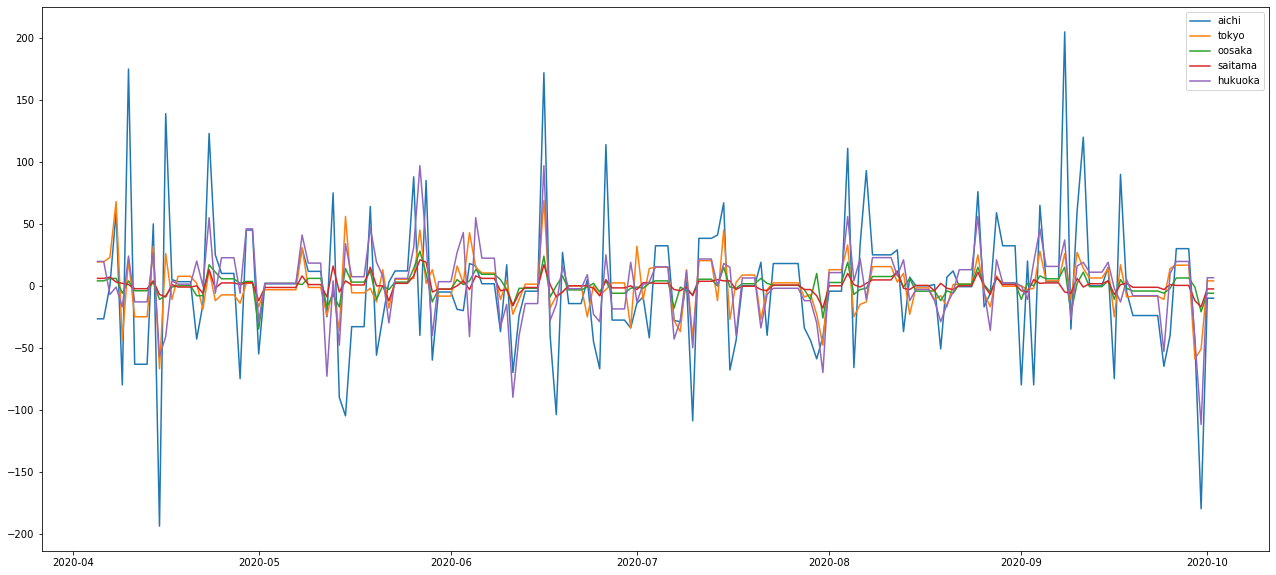

In [84]:
plt.figure(figsize=(22,10))
plt.plot(T_aichi['diff'], label = 'aichi')
plt.plot(T_tokyo['diff'], label = 'tokyo')
plt.plot(T_oosaka['diff'], label = 'oosaka')
plt.plot(T_saitama['diff'], label = 'saitama')
plt.plot(T_hukuoka['diff'], label = 'hukuoka')
plt.savefig('best5.png')
plt.legend(loc='best')
plt.show()

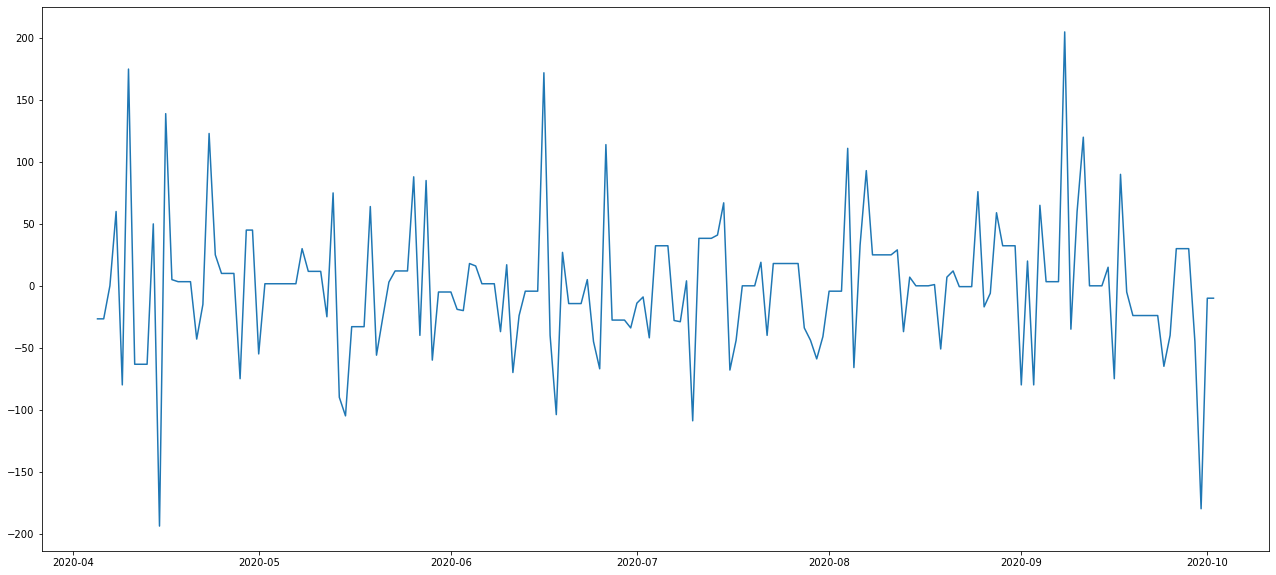

In [85]:
plt.plot(T_aichi['diff'], label = 'aichi')
plt.savefig('aichi.png')

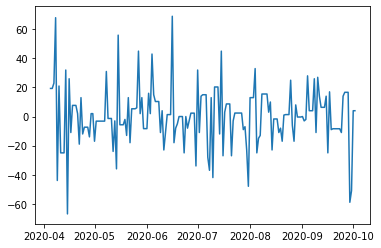

In [86]:
plt.plot(T_tokyo['diff'], label = 'tokyo')
plt.savefig('tokyo.png')

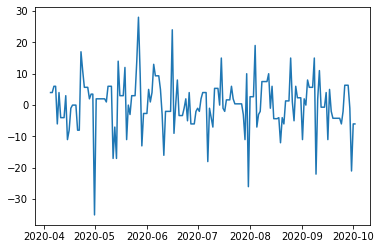

In [87]:
plt.plot(T_oosaka['diff'], label = 'oosaka')
plt.savefig('oosaka.png')

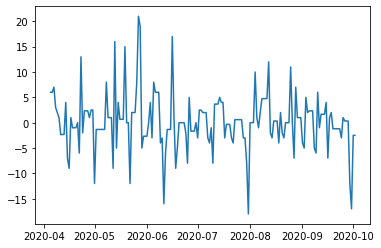

In [88]:
plt.plot(T_saitama['diff'], label = 'saitama')
plt.savefig('saitama.png')

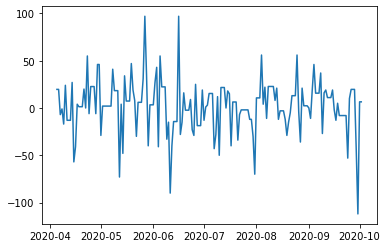

In [89]:
plt.plot(T_hukuoka['diff'], label = 'hukuoka')
plt.savefig('hukuoka.png')

Epoch 1/50
 - 0s - loss: 0.6016 - mean_absolute_error: 0.7329
Epoch 2/50
 - 0s - loss: 0.5459 - mean_absolute_error: 0.6962
Epoch 3/50
 - 0s - loss: 0.5066 - mean_absolute_error: 0.6697
Epoch 4/50
 - 0s - loss: 0.4719 - mean_absolute_error: 0.6452
Epoch 5/50
 - 0s - loss: 0.4402 - mean_absolute_error: 0.6223
Epoch 6/50
 - 0s - loss: 0.4101 - mean_absolute_error: 0.5996
Epoch 7/50
 - 0s - loss: 0.3817 - mean_absolute_error: 0.5774
Epoch 8/50
 - 0s - loss: 0.3544 - mean_absolute_error: 0.5555
Epoch 9/50
 - 0s - loss: 0.3282 - mean_absolute_error: 0.5335
Epoch 10/50
 - 0s - loss: 0.3029 - mean_absolute_error: 0.5119
Epoch 11/50
 - 0s - loss: 0.2787 - mean_absolute_error: 0.4900
Epoch 12/50
 - 0s - loss: 0.2555 - mean_absolute_error: 0.4685
Epoch 13/50
 - 0s - loss: 0.2332 - mean_absolute_error: 0.4466
Epoch 14/50
 - 0s - loss: 0.2120 - mean_absolute_error: 0.4255
Epoch 15/50
 - 0s - loss: 0.1914 - mean_absolute_error: 0.4034
Epoch 16/50
 - 0s - loss: 0.1718 - mean_absolute_error: 0.3815
E

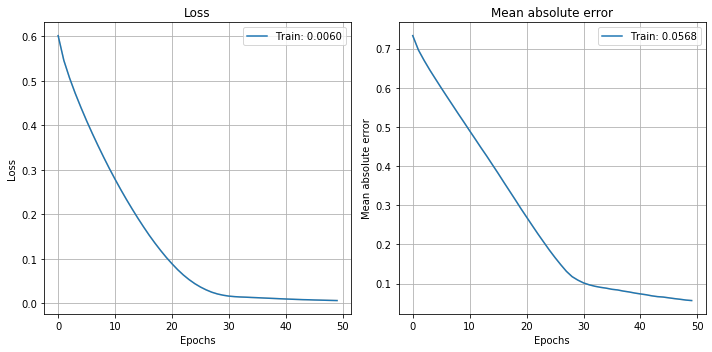

In [90]:
iwate = pd.read_csv('program/Stock2/stock2.csv', encoding="shift_jis")
iwate['day'] = pd.to_datetime(iwate['day'], format='%Y/%m/%d')
iwate.set_index('day')
dateTimeIndex = pd.DatetimeIndex(iwate['day'])
iwate.index = dateTimeIndex
iwate = iwate['2019-10-02':'2020-10-02']
iwate = iwate.resample('D').interpolate()
iwate.drop("day", axis=1)
L = len(iwate)
Y = iwate.iloc[:, 4]  # 終値の列のみ抽出する。
Y = np.array(Y)  # numpy配列に変換する。
Y = Y.reshape(-1, 1)  # 行列に変換する。（配列の要素数行×1列）
X1 = Y[0:L-3, :]  # 予測対象日の3日前のデータ
X2 = Y[1:L-2, :]  # 予測対象日の2日前のデータ
X3 = Y[2:L-1, :]  # 予測対象日の前日データ
Y = Y[3:L, :]  # 予測対象日のデータ
X = np.concatenate([X1, X2, X3], axis=1)  # numpy配列を結合する。
scaler.fit(X)  # スケーリングに使用する最小／最大値を計算する。
X = scaler.transform(X)  # Xをを0～1の範囲にスケーリングする。
scaler1.fit(Y)  # スケーリングに使用する最小／最大値を計算する。
Y = scaler1.transform(Y)  # Yをを0～1の範囲にスケーリングする。
X = np.reshape(X, (X.shape[0], 1, X.shape[1]))  # 3次元配列に変換する。
# train, testデータを定義
X_train = X[:182, :, :]
X_test = X[182:, :, :]
Y_train = Y[:182, :]
Y_test = Y[182:, :]
model = Sequential()
model.add(LSTM(10, activation = 'tanh', input_shape = (1,3), recurrent_activation= 'hard_sigmoid'))
model.add(Dense(1))
model.compile(loss= 'mean_squared_error', optimizer = 'rmsprop', metrics=[metrics.mae])
history = model.fit(X_train, Y_train, epochs=50, verbose=2).history
plot_history(history)
P_iwate = model.predict(X_test)
# オリジナルのスケールに戻す、タイムインデックスを付ける。
Y_train = scaler1.inverse_transform(Y_train)
Y_train = pd.DataFrame(Y_train)
Y_train.index = pd.to_datetime(iwate.iloc[3:185,0])
Y_test = scaler1.inverse_transform(Y_test)
Y_test = pd.DataFrame(Y_test)
Y_test.index = pd.to_datetime(iwate.iloc[185:,0])
P_iwate = scaler1.inverse_transform(P_iwate)
P_iwate = pd.DataFrame(P_iwate)
P_iwate.index=pd.to_datetime(iwate.iloc[185:,0])
P_iwate.index = TimeIndex2
Y_test.index = TimeIndex2
T_iwate = Y_test
P_iwate['diff']=P_iwate.diff()
T_iwate['diff'] = T_iwate.diff()


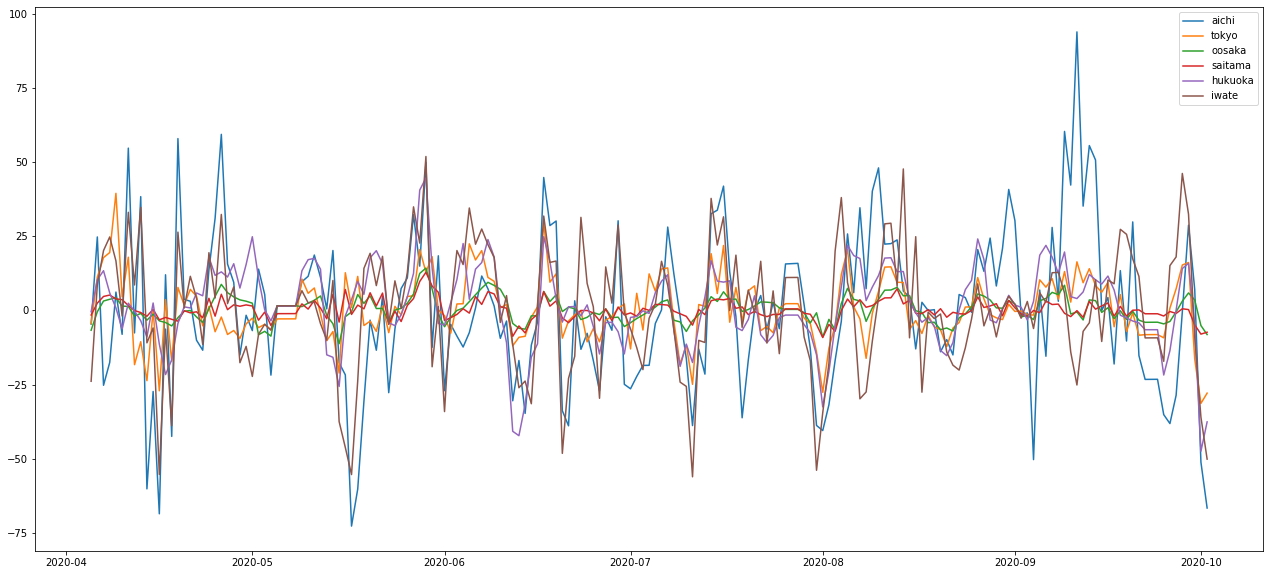

In [91]:
plt.figure(figsize=(22,10))
plt.plot(P_aichi['diff'], label = 'aichi')
plt.plot(P_tokyo['diff'], label = 'tokyo')
plt.plot(P_oosaka['diff'], label = 'oosaka')
plt.plot(P_saitama['diff'], label = 'saitama')
plt.plot(P_hukuoka['diff'], label = 'hukuoka')
plt.plot(P_iwate['diff'], label = 'iwate')
plt.savefig('P_best5.png')
plt.legend(loc='best')
plt.show()

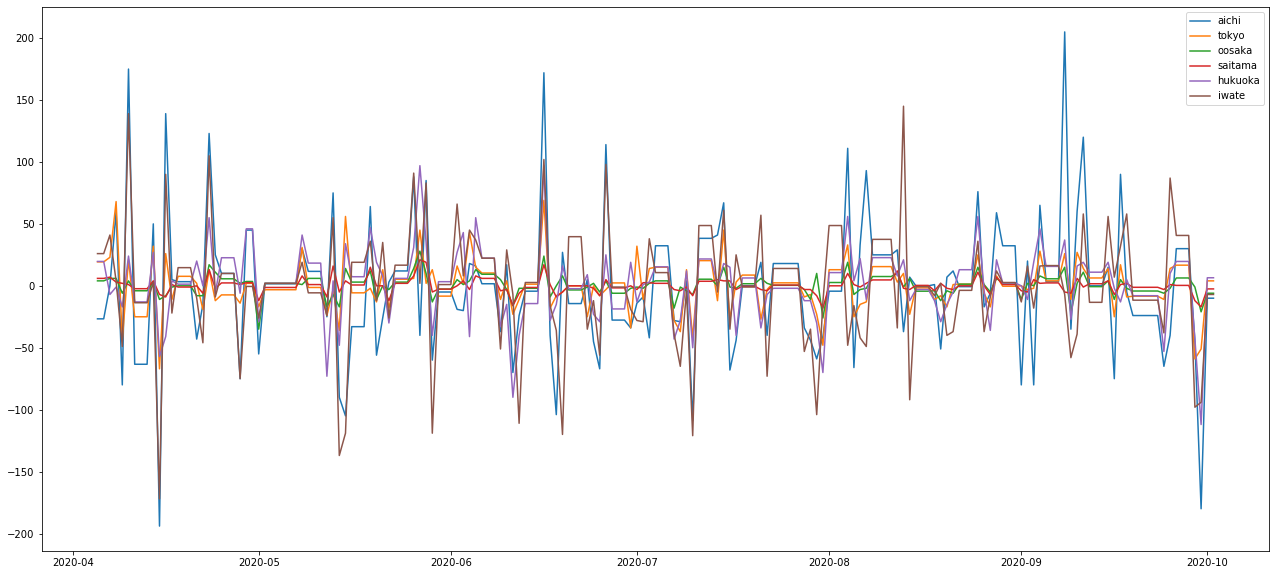

In [92]:
plt.figure(figsize=(22,10))
plt.plot(T_aichi['diff'], label = 'aichi')
plt.plot(T_tokyo['diff'], label = 'tokyo')
plt.plot(T_oosaka['diff'], label = 'oosaka')
plt.plot(T_saitama['diff'], label = 'saitama')
plt.plot(T_hukuoka['diff'], label = 'hukuoka')
plt.plot(T_iwate['diff'], label = 'iwate')
plt.savefig('best5.png')
plt.legend(loc='best')
plt.show()